In [148]:
import pandas as pd
import numpy as np
from adtk.visualization import plot
from adtk.data import validate_series
from adtk.detector import ThresholdAD
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from pmdarima import auto_arima
import statsmodels.api as sm

In [149]:
df = pd.read_excel('../dataFrames/Project1_dataset.xlsx', index_col='Период')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 201901 to 202112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Доходы_1  36 non-null     float64
 1   Доходы_2  36 non-null     float64
dtypes: float64(2)
memory usage: 864.0 bytes


In [150]:
df.reset_index(inplace=True)

In [151]:
# Convert the date column to a datetime object
df['Период'] = pd.to_datetime(df['Период'], format='%Y%m')

# Change the date format to '01.01.2019'
df['Период'] = df['Период'].dt.strftime('%d.%m.%Y')

# Save the modified dataset
df.to_excel('my_modified_dataset.xlsx', index=True)

In [152]:
df['Период'] = pd.to_datetime(df['Период'], format='%d.%m.%Y')

In [153]:
df.head()

,Период,Доходы_1,Доходы_2
0,2019-01-01,9334750.309,3.954998e+06
1,2019-02-01,9285036.374,3.917801e+06
2,2019-03-01,9221571.473,3.858750e+06
3,2019-04-01,9223271.382,3.843909e+06
4,2019-05-01,9211187.625,3.817744e+06


In [154]:
df_i = df.set_index('Период')

In [155]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2019-01-01 to 2021-12-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Доходы_1  36 non-null     float64
 1   Доходы_2  36 non-null     float64
dtypes: float64(2)
memory usage: 864.0 bytes


In [156]:
df=validate_series(df_i)

In [157]:
print(df)

                Доходы_1      Доходы_2
Период                                
2019-01-01  9.334750e+06  3.954998e+06
2019-02-01  9.285036e+06  3.917801e+06
2019-03-01  9.221571e+06  3.858750e+06
2019-04-01  9.223271e+06  3.843909e+06
2019-05-01  9.211188e+06  3.817744e+06
2019-06-01  9.147953e+06  3.784239e+06
2019-07-01  9.143857e+06  3.761693e+06
2019-08-01  9.112286e+06  3.722387e+06
2019-09-01  9.097832e+06  3.701241e+06
2019-10-01  9.097930e+06  3.674583e+06
2019-11-01  9.116114e+06  3.656831e+06
2019-12-01  9.151472e+06  3.646283e+06
2020-01-01  9.148524e+06  3.619268e+06
2020-02-01  9.213578e+06  3.605335e+06
2020-03-01  9.283785e+06  3.598263e+06
2020-04-01  9.513819e+06  3.612079e+06
2020-05-01  9.608976e+06  3.608993e+06
2020-06-01  9.591477e+06  3.570075e+06
2020-07-01  9.615725e+06  3.554326e+06
2020-08-01  9.788851e+06  3.543186e+06
2020-09-01  9.878887e+06  3.537266e+06
2020-10-01  9.952047e+06  3.522774e+06
2020-11-01  1.028014e+07  3.498679e+06
2020-12-01  1.032328e+07 

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

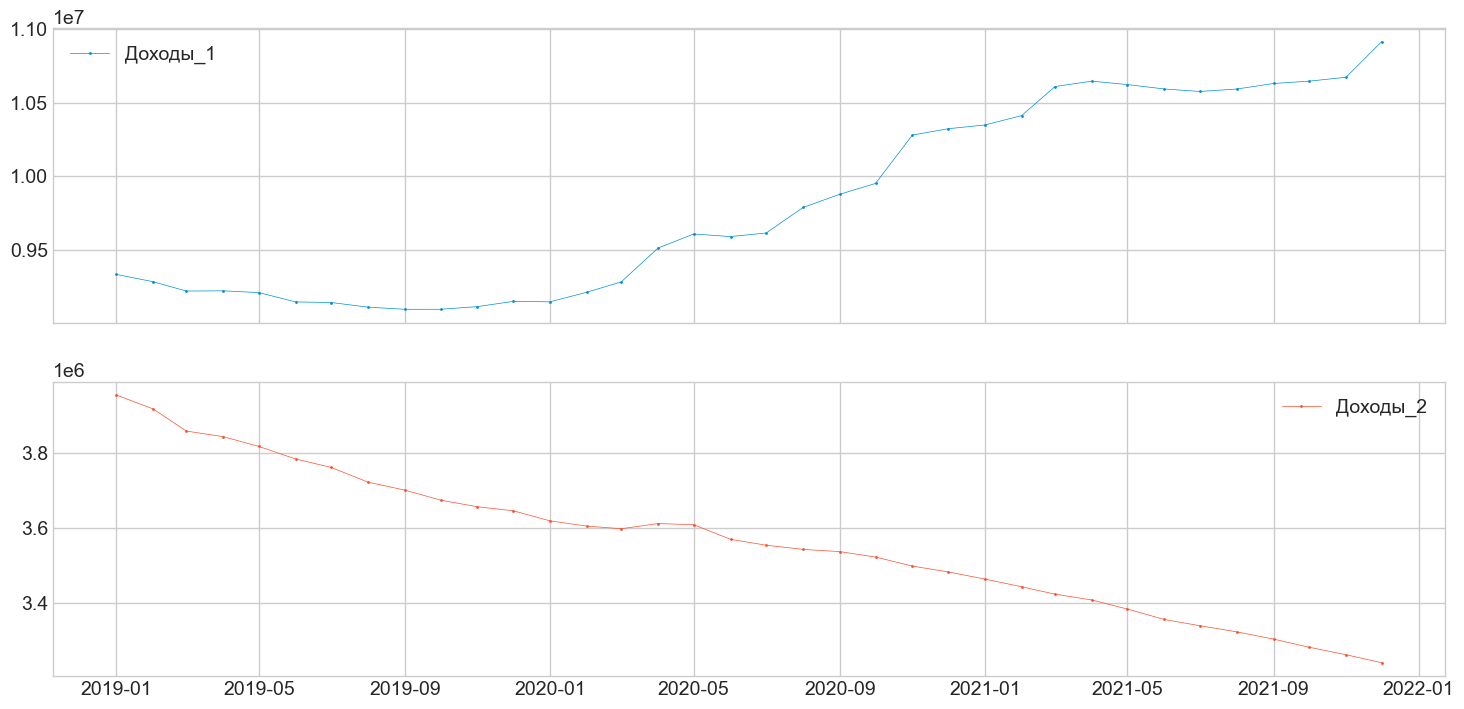

In [158]:
plot(df)

In [159]:
df.describe()

,Доходы_1,Доходы_2
count,3.600000e+01,3.600000e+01
mean,9.822487e+06,3.564619e+06
std,6.423512e+05,1.916437e+05
min,9.097832e+06,3.240876e+06
25%,9.212981e+06,3.419977e+06
50%,9.612351e+06,3.562201e+06
75%,1.058046e+07,3.681248e+06
max,1.091523e+07,3.954998e+06


array([[<AxesSubplot:title={'center':'Доходы_1'}>,
        <AxesSubplot:title={'center':'Доходы_2'}>]], dtype=object)

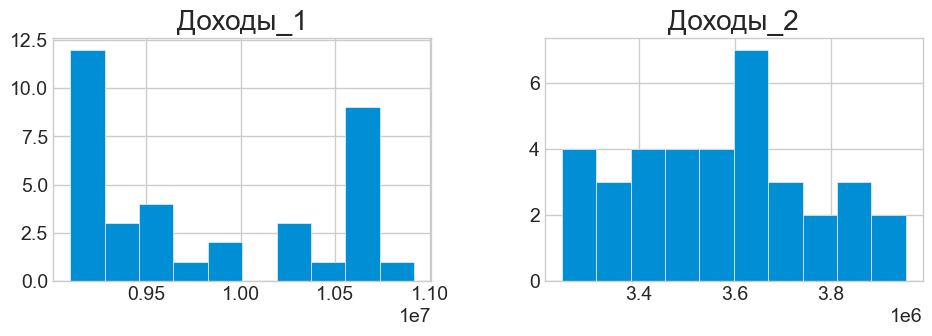

In [160]:
df.hist()

In [161]:
income_1_df = df.drop(['Доходы_2'], axis=1)
income_2_df = df.drop(['Доходы_1'], axis=1)
income_1_df

,Доходы_1
Период,
2019-01-01,9.334750e+06
2019-02-01,9.285036e+06
2019-03-01,9.221571e+06
2019-04-01,9.223271e+06
2019-05-01,9.211188e+06
2019-06-01,9.147953e+06
2019-07-01,9.143857e+06
2019-08-01,9.112286e+06
2019-09-01,9.097832e+06


[<AxesSubplot:>]

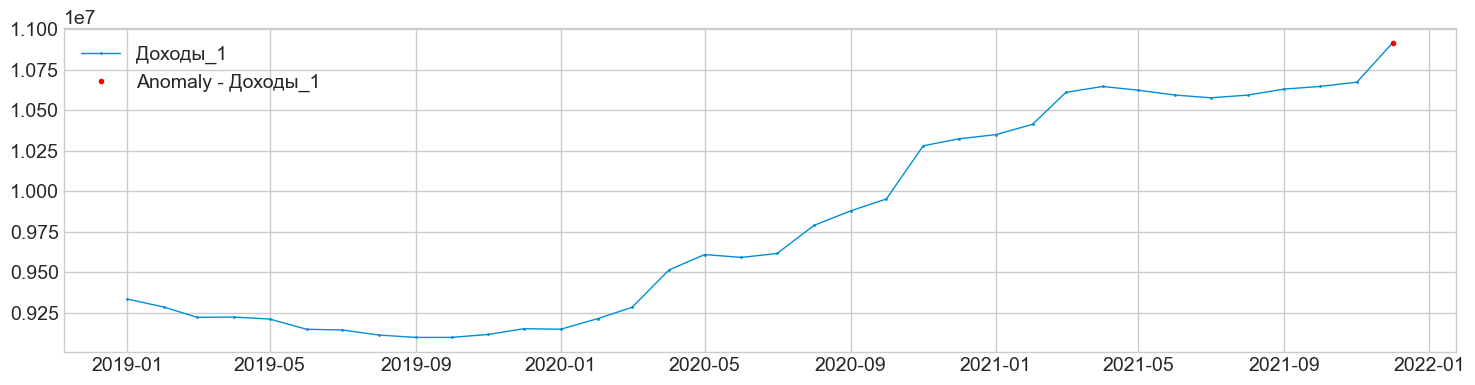

In [162]:
threshold = ThresholdAD(high=1.085023e+07, low=9.085032e+06)
anomalies_1 = threshold.detect(income_1_df)
plot(income_1_df, anomaly= anomalies_1, ts_linewidth=1, anomaly_markersize=3, anomaly_color='red', anomaly_tag='marker')

[<AxesSubplot:>]

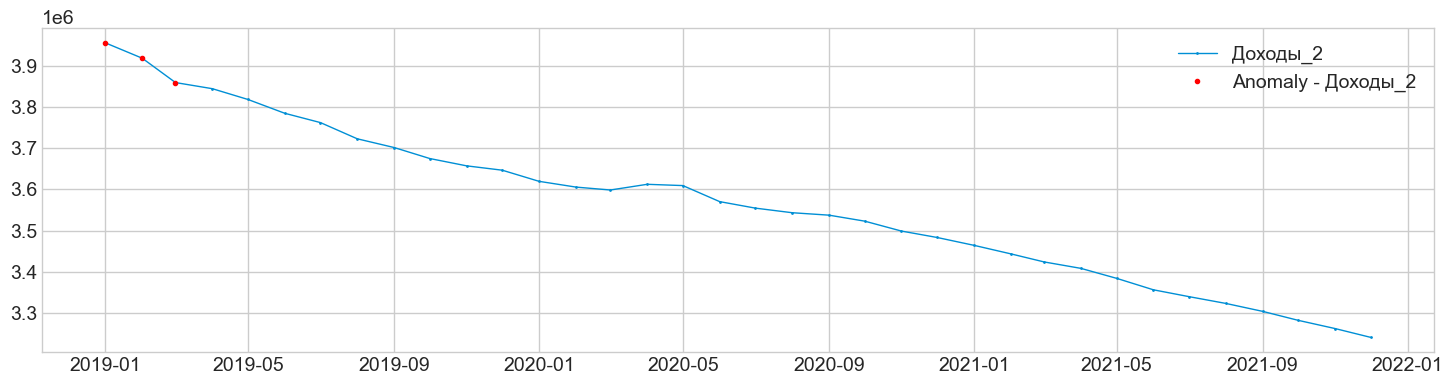

In [163]:
threshold = ThresholdAD(high=3.854998e+06, low=3.150876e+06)
anomalies_2 = threshold.detect(income_2_df)
plot(income_2_df, anomaly= anomalies_2, ts_linewidth=1, anomaly_markersize=3, anomaly_color='red', anomaly_tag='marker')

In [164]:
anomalies_1[anomalies_1.Доходы_1]

,Доходы_1
Период,
2021-12-01,True


In [165]:
anomalies_2[anomalies_2.Доходы_2]

,Доходы_2
Период,
2019-01-01,True
2019-02-01,True
2019-03-01,True


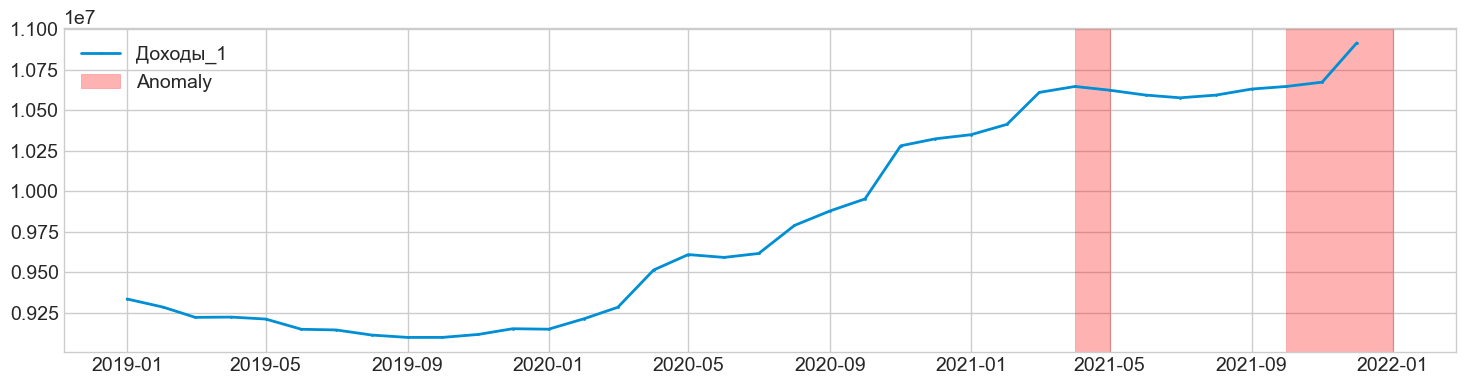

In [166]:
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.1))
anomalies_1 = outlier_detector.fit_detect(income_1_df)
plot(income_1_df, anomaly=anomalies_1, ts_linewidth=2, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

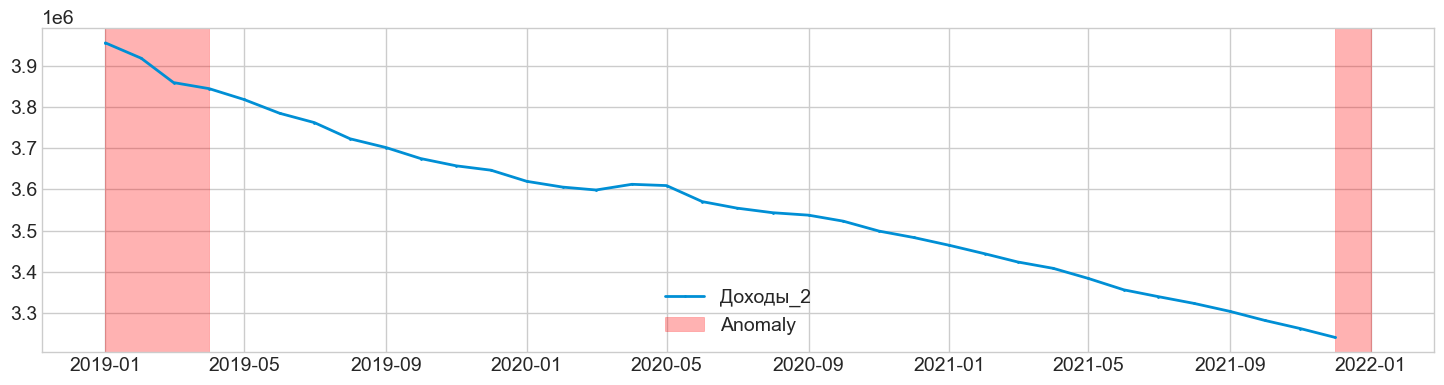

In [167]:
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.1))
anomalies_2 = outlier_detector.fit_detect(income_2_df)
plot(income_2_df, anomaly=anomalies_2, ts_linewidth=2, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

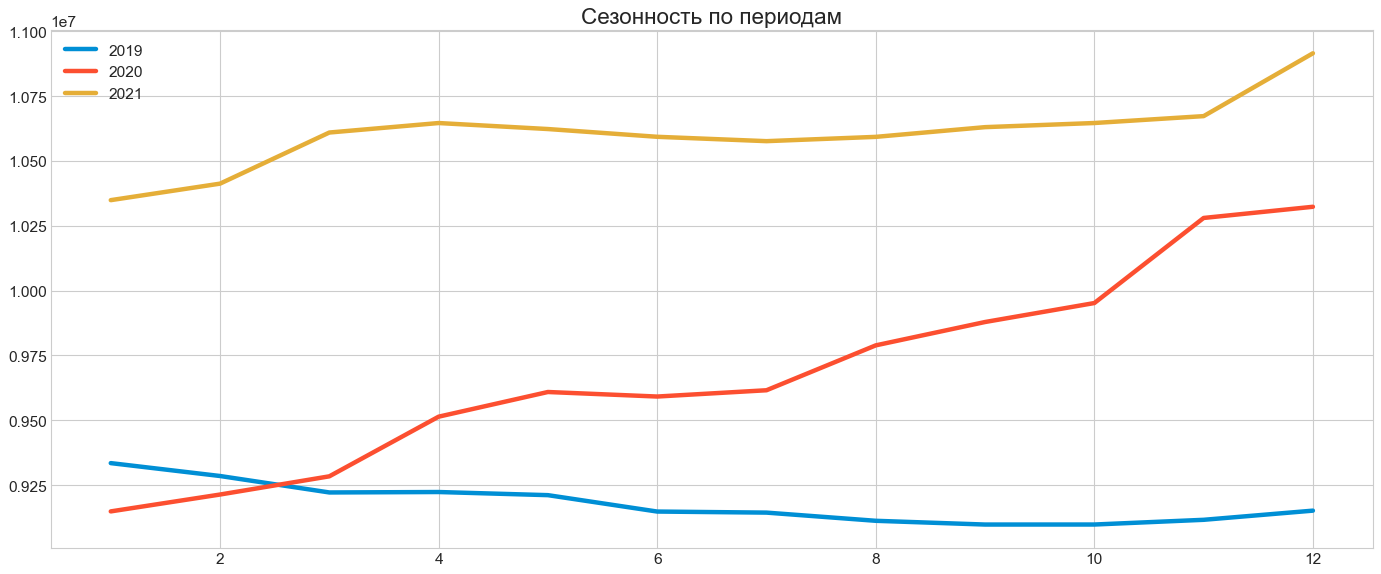

In [168]:
# функция графика сезонности
def sesonal(data, s):
    plt.figure(figsize=(19,8), dpi= 80)
    for i, y in enumerate(data.index.year.unique()):
        plt.plot(list(range(1,len(data[data.index.year==y])+1)), data[data.index.year==y][data.columns[0]].values, label=y)
    plt.title("Сезонность по периодам")
    plt.legend(loc="best")
    plt.show()

sesonal(income_1_df, 12)

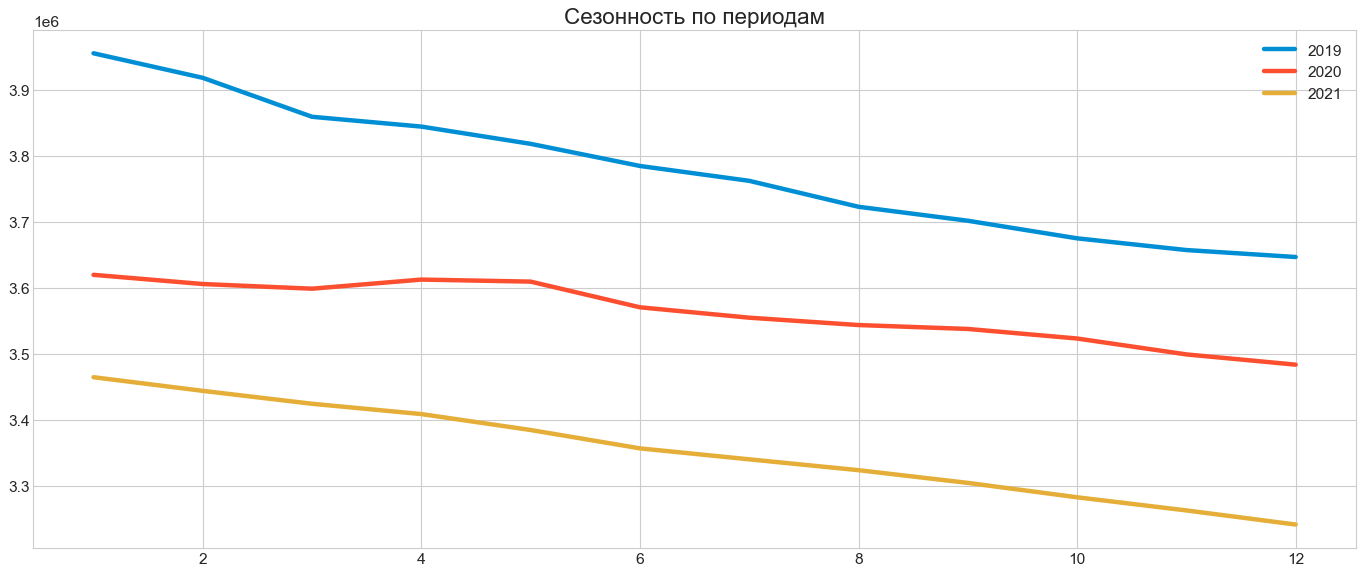

In [169]:
sesonal(income_2_df, 12)

Text(0.5, 0.98, 'Мультипликативная модель')

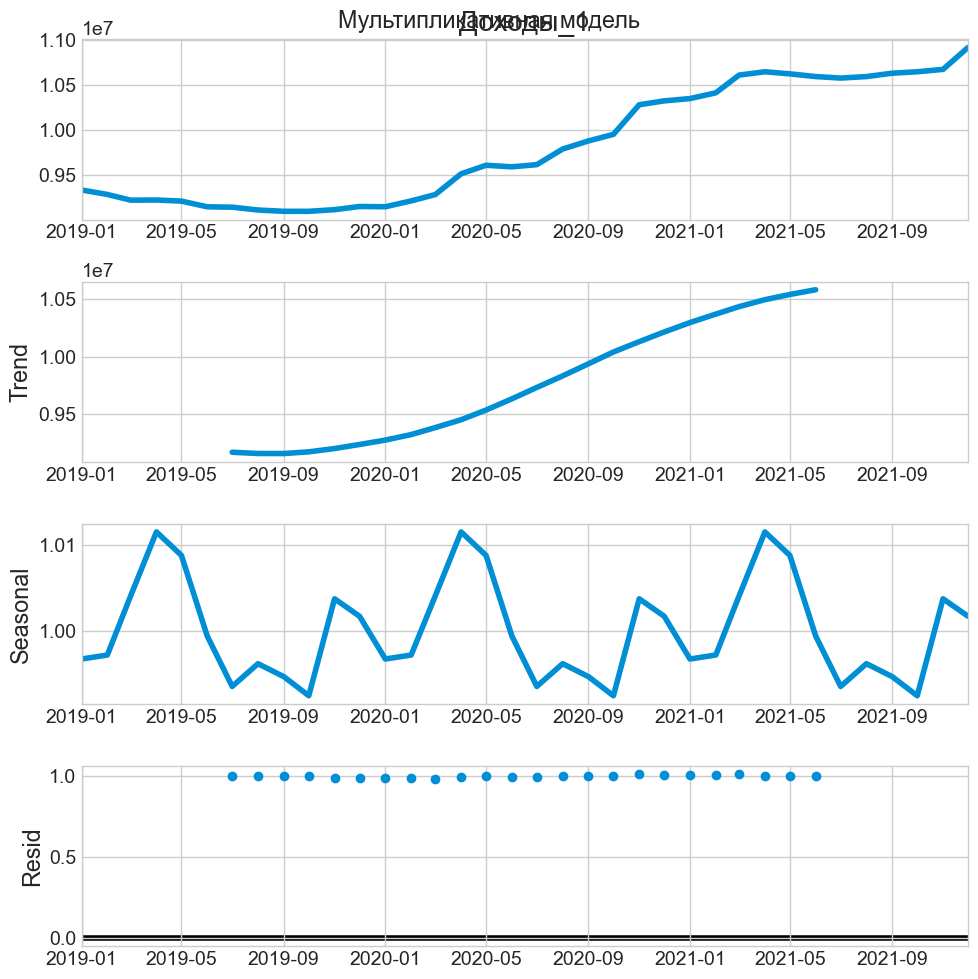

In [170]:
# декомпозиция
result_M_1 = seasonal_decompose(income_1_df['Доходы_1'], model='multiplicative', period=12)

# Построение графика
plt.rcParams.update({'figure.figsize': (10,10)})
result_M_1.plot().suptitle('Мультипликативная модель')

Text(0.5, 0.98, 'Мультипликативная модель')

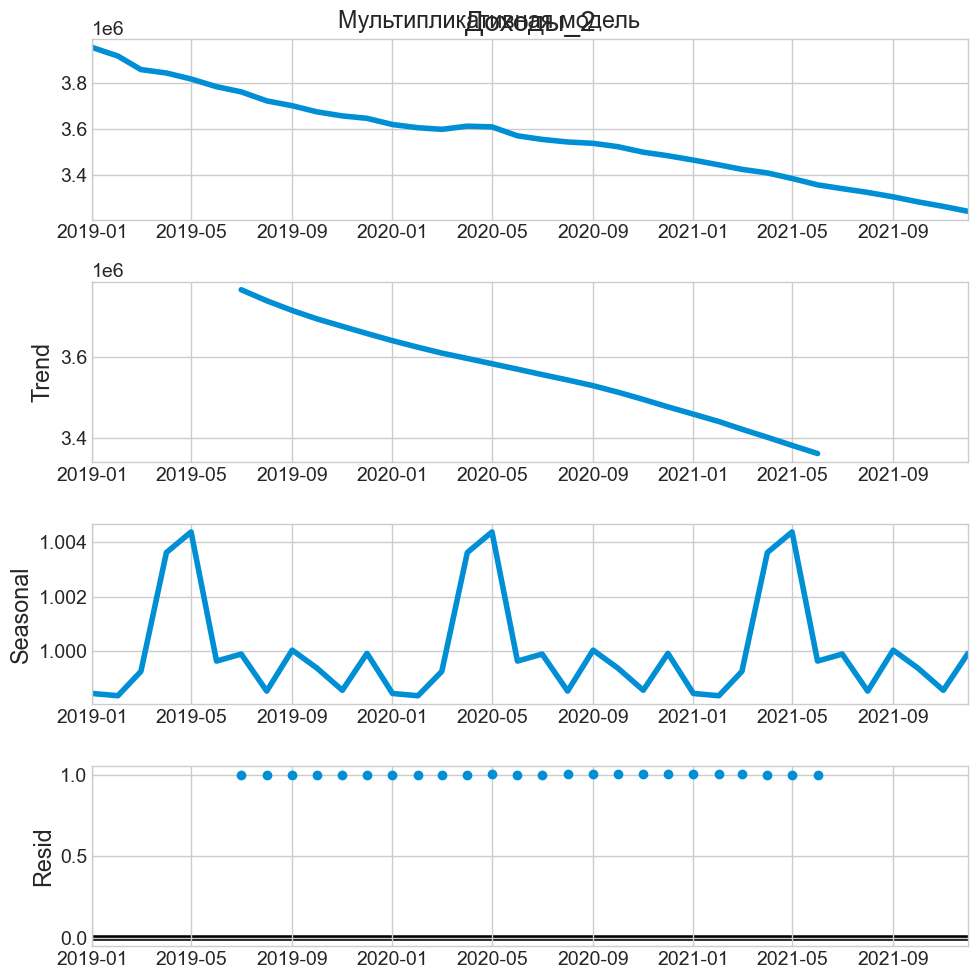

In [171]:
# декомпозиция
result_M_2 = seasonal_decompose(income_2_df.Доходы_2, model='multiplicative', period=12)

# Построение графика
plt.rcParams.update({'figure.figsize': (10,10)})
result_M_2.plot().suptitle('Мультипликативная модель')

In [172]:
result_M_2.seasonal['2019']

Период
2019-01-01    0.998446
2019-02-01    0.998363
2019-03-01    0.999257
2019-04-01    1.003613
2019-05-01    1.004368
2019-06-01    0.999634
2019-07-01    0.999891
2019-08-01    0.998534
2019-09-01    1.000035
2019-10-01    0.999379
2019-11-01    0.998564
2019-12-01    0.999916
Freq: MS, Name: seasonal, dtype: float64

In [173]:
result_M_1.seasonal['2021']

Период
2021-01-01    0.996730
2021-02-01    0.997196
2021-03-01    1.004073
2021-04-01    1.011509
2021-05-01    1.008781
2021-06-01    0.999405
2021-07-01    0.993542
2021-08-01    0.996187
2021-09-01    0.994679
2021-10-01    0.992460
2021-11-01    1.003733
2021-12-01    1.001705
Freq: MS, Name: seasonal, dtype: float64

In [174]:
result_M_2.trend['2020']

Период
2020-01-01    3.639446e+06
2020-02-01    3.623339e+06
2020-03-01    3.609040e+06
2020-04-01    3.595882e+06
2020-05-01    3.582967e+06
2020-06-01    3.569580e+06
2020-07-01    3.556318e+06
2020-08-01    3.543109e+06
2020-09-01    3.529098e+06
2020-10-01    3.513340e+06
2020-11-01    3.495479e+06
2020-12-01    3.477203e+06
Freq: MS, Name: trend, dtype: float64

Text(0.5, 0.98, 'Адитивная модель')

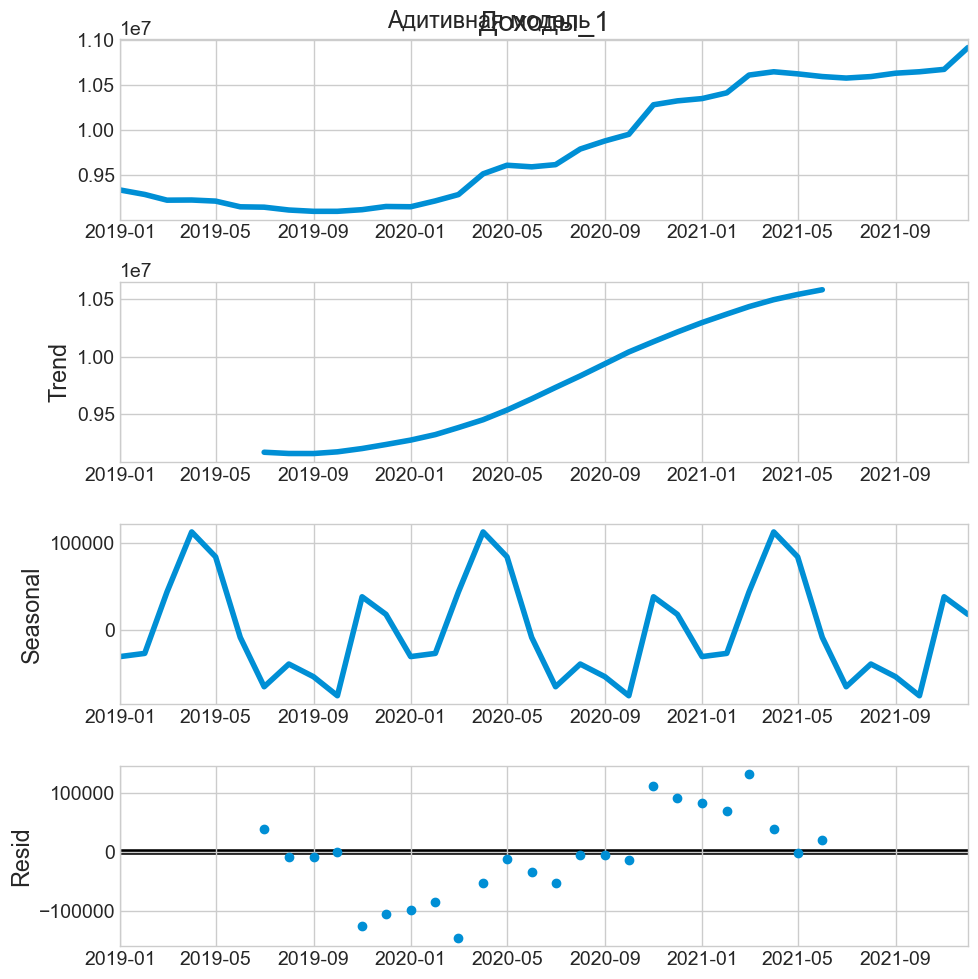

In [175]:
# Decompose
result_A1 = seasonal_decompose(income_1_df.Доходы_1, model='additive', period=12)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_A1.plot().suptitle('Адитивная модель')

Text(0.5, 0.98, 'Адитивная модель')

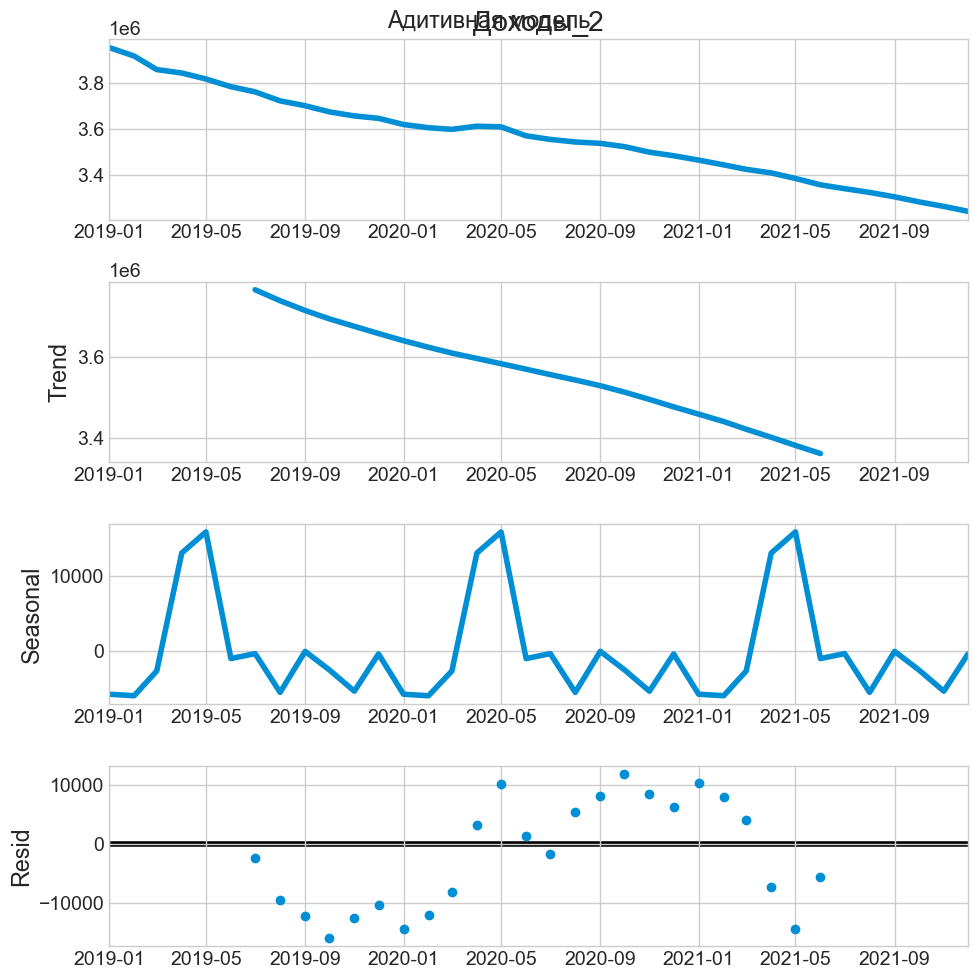

In [176]:
# Decompose
result_A2 = seasonal_decompose(income_2_df.Доходы_2, model='additive', period=12)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_A2.plot().suptitle('Адитивная модель')

In [177]:
result_A2.seasonal['2020']

Период
2020-01-01    -5648.756313
2020-02-01    -5849.370982
2020-03-01    -2579.682662
2020-04-01    12976.317877
2020-05-01    15758.930246
2020-06-01     -943.569476
2020-07-01     -290.047771
2020-08-01    -5404.463889
2020-09-01        4.854372
2020-10-01    -2434.584184
2020-11-01    -5248.618855
2020-12-01     -341.008361
Freq: MS, Name: seasonal, dtype: float64

In [178]:
result_A1.seasonal['2020']

Период
2020-01-01    -30415.794321
2020-02-01    -26733.332113
2020-03-01     44152.928804
2020-04-01    113284.204783
2020-05-01     84602.980950
2020-06-01     -8288.482842
2020-07-01    -65174.554217
2020-08-01    -39012.092196
2020-09-01    -53626.912634
2020-10-01    -75559.480363
2020-11-01     38520.296950
2020-12-01     18250.237200
Freq: MS, Name: seasonal, dtype: float64

In [179]:
fit2_2 = ExponentialSmoothing(income_2_df, seasonal_periods=12, trend='mul', seasonal='add').fit()

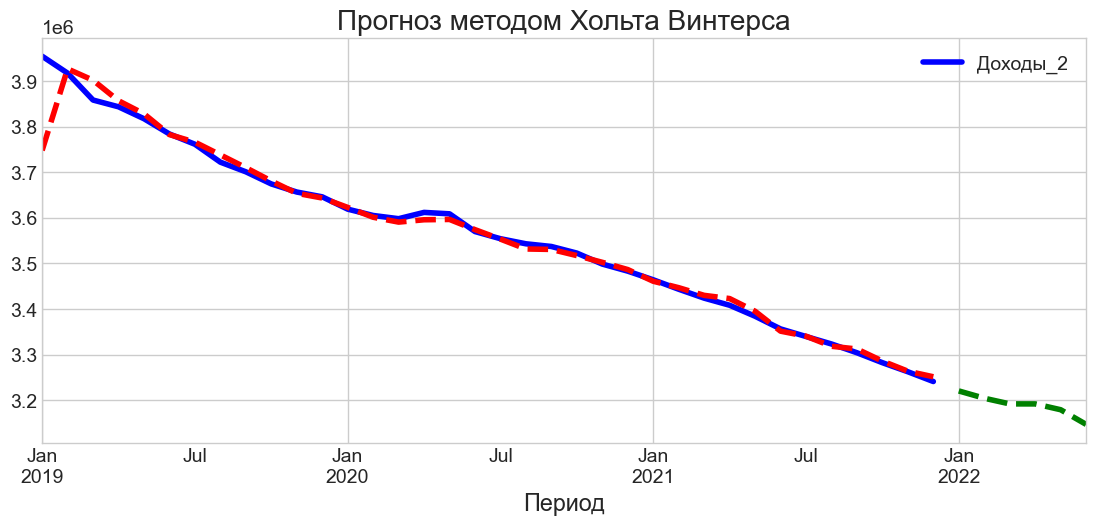

In [180]:
ax = income_2_df.plot(figsize=(12,5), color='blue', title="Прогноз методом Хольта Винтерса" )
fit2_2.fittedvalues.plot(ax=ax, style='--', color='red')
fit2_2.forecast(6).plot(ax=ax, style='--', color='green')
plt.show()

In [181]:
fit2_2.params

{'smoothing_level': 0.9596428571428571,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.0001,
 'damping_trend': nan,
 'initial_level': 3772223.17340083,
 'initial_trend': 0.9951095214775241,
 'initial_seasons': array([-5.64875631e+03, -5.84937098e+03, -2.57968266e+03,  1.29763179e+04,
         1.57589302e+04, -9.43569476e+02, -2.90047771e+02, -5.40446389e+03,
         4.85437154e+00, -2.43458418e+03, -5.24861885e+03, -3.41008361e+02]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [182]:
fit2_2.fittedvalues

Период
2019-01-01    3.748126e+06
2019-02-01    3.927141e+06
2019-03-01    3.902277e+06
2019-04-01    3.857185e+06
2019-05-01    3.828503e+06
2019-06-01    3.782893e+06
2019-07-01    3.766340e+06
2019-08-01    3.738380e+06
2019-09-01    3.710218e+06
2019-10-01    3.681071e+06
2019-11-01    3.654056e+06
2019-12-01    3.643727e+06
2020-01-01    3.623069e+06
2020-02-01    3.601480e+06
2020-03-01    3.590796e+06
2020-04-01    3.595922e+06
2020-05-01    3.596623e+06
2020-06-01    3.574235e+06
2020-07-01    3.553444e+06
2020-08-01    3.531803e+06
2020-09-01    3.530798e+06
2020-10-01    3.517282e+06
2020-11-01    3.502515e+06
2020-12-01    3.486619e+06
2021-01-01    3.460974e+06
2021-02-01    3.446828e+06
2021-03-01    3.429996e+06
2021-04-01    3.422940e+06
2021-05-01    3.395050e+06
2021-06-01    3.351406e+06
2021-07-01    3.340362e+06
2021-08-01    3.318279e+06
2021-09-01    3.312200e+06
2021-10-01    3.285731e+06
2021-11-01    3.263453e+06
2021-12-01    3.251266e+06
Freq: MS, dtype: floa

In [183]:
fit2_2.forecast(6)

2022-01-01    3.220164e+06
2022-02-01    3.204174e+06
2022-03-01    3.191751e+06
2022-04-01    3.191696e+06
2022-05-01    3.178942e+06
2022-06-01    3.146779e+06
Freq: MS, dtype: float64

In [184]:
fit1_4 = ExponentialSmoothing(income_1_df, seasonal_periods=12, trend='mul', seasonal='mul').fit()

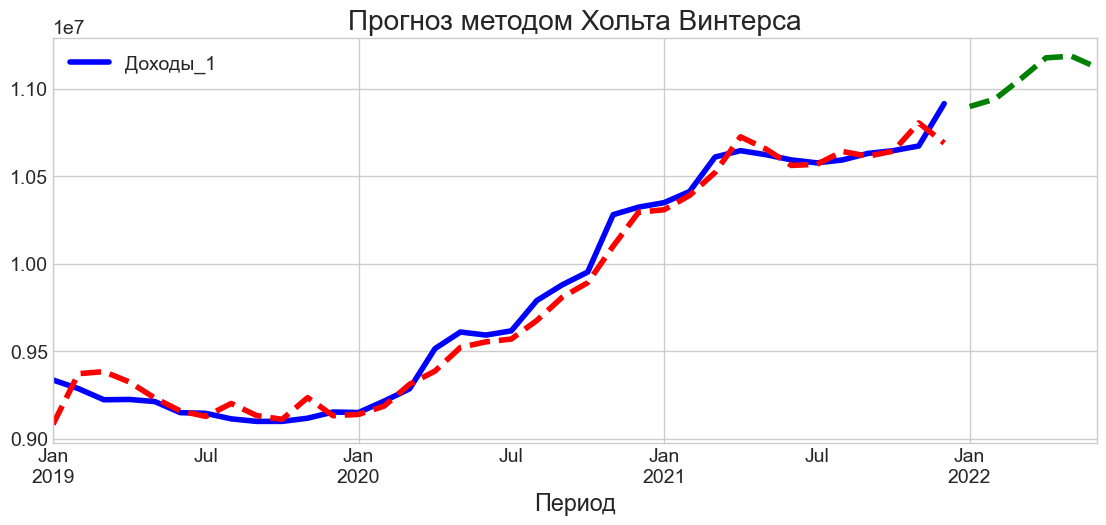

In [185]:
ax = income_1_df.plot(figsize=(12,5), color='blue', title="Прогноз методом Хольта Винтерса" )
fit1_4.fittedvalues.plot(ax=ax, style='--', color='red')
fit1_4.forecast(6).plot(ax=ax, style='--', color='green')
plt.show()

In [186]:
fit1_4.params

{'smoothing_level': 0.995,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.0001,
 'damping_trend': nan,
 'initial_level': 9078611.635308329,
 'initial_trend': 1.003521951347519,
 'initial_seasons': array([0.99673031, 0.9971961 , 1.00407319, 1.01150894, 1.00878066,
        0.99940517, 0.99354227, 0.9961875 , 0.99467897, 0.99245959,
        1.00373262, 1.00170468]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [187]:
fit1_4.fittedvalues

Период
2019-01-01    9.080797e+06
2019-02-01    9.370756e+06
2019-03-01    9.382448e+06
2019-04-01    9.323396e+06
2019-05-01    9.231283e+06
2019-06-01    9.157809e+06
2019-07-01    9.126356e+06
2019-08-01    9.200395e+06
2019-09-01    9.130955e+06
2019-10-01    9.109648e+06
2019-11-01    9.233713e+06
2019-12-01    9.130292e+06
2020-01-01    9.137985e+06
2020-02-01    9.184917e+06
2020-03-01    9.309612e+06
2020-04-01    9.385581e+06
2020-05-01    9.520923e+06
2020-06-01    9.552753e+06
2020-07-01    9.568595e+06
2020-08-01    9.675032e+06
2020-09-01    9.807896e+06
2020-10-01    9.891223e+06
2020-11-01    1.010024e+07
2020-12-01    1.029466e+07
2021-01-01    1.030813e+07
2021-02-01    1.038991e+07
2021-03-01    1.052115e+07
2021-04-01    1.072545e+07
2021-05-01    1.065533e+07
2021-06-01    1.056160e+07
2021-07-01    1.056797e+07
2021-08-01    1.064184e+07
2021-09-01    1.061437e+07
2021-10-01    1.064396e+07
2021-11-01    1.080517e+07
2021-12-01    1.068951e+07
Freq: MS, dtype: floa

In [188]:
fit1_4.forecast(6)

2022-01-01    1.089824e+07
2022-02-01    1.094176e+07
2022-03-01    1.105607e+07
2022-04-01    1.117725e+07
2022-05-01    1.118643e+07
2022-06-01    1.112157e+07
Freq: MS, dtype: float64

In [189]:
def metrics(real, forecast):

    if type(real)==pd.core.frame.DataFrame:
        real=real[real.columns[0]].values

    print("Тест на стационарность:")
    dftest = adfuller(real-forecast, autolag='AIC')
    print("\tT-статистика = {:.3f}".format(dftest[0]))
    print("\tP-значение = {:.3f}".format(dftest[1]))
    print("Критические значения :")
    for k, v in dftest[4].items():
        print("\t{}: {} - Данные {} стационарны с вероятностью {}% процентов".format(k, v, "не" if v<dftest[0] else "", 100-int(k[:-1])))

    #real=np.array(real[real.columns[0]].values)
    forecast=np.array(forecast)
    print('MAD:', round(abs(real-forecast).mean(),4))
    print('MSE:', round(((real-forecast)**2).mean(),4))
    print('MAPE:', round((abs(real-forecast)/real).mean(),4))
    print('MPE:', round(((real-forecast)/real).mean(),4))
    print('Стандартная ошибка:', round(((real-forecast)**2).mean()**0.5,4))


In [190]:
metrics(income_1_df, fit1_4.fittedvalues)

Тест на стационарность:
	T-статистика = -2.075
	P-значение = 0.255
Критические значения :
	1%: -3.6889256286443146 - Данные не стационарны с вероятностью 99% процентов
	5%: -2.9719894897959187 - Данные не стационарны с вероятностью 95% процентов
	10%: -2.6252957653061224 - Данные не стационарны с вероятностью 90% процентов
MAD: 68599.5951
MSE: 8491937931.9421
MAPE: 0.007
MPE: 0.0015
Стандартная ошибка: 92151.7115


In [191]:
metrics(income_2_df, fit2_2.fittedvalues)

Тест на стационарность:
	T-статистика = -2.029
	P-значение = 0.274
Критические значения :
	1%: -3.6699197407407405 - Данные не стационарны с вероятностью 99% процентов
	5%: -2.9640707407407407 - Данные не стационарны с вероятностью 95% процентов
	10%: -2.621171111111111 - Данные не стационарны с вероятностью 90% процентов
MAD: 13278.5214
MSE: 1301757769.9138
MAPE: 0.0035
MPE: 0.0007
Стандартная ошибка: 36079.8804


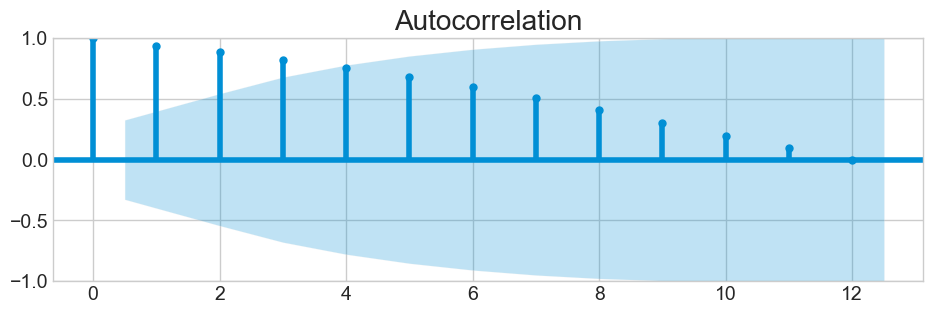

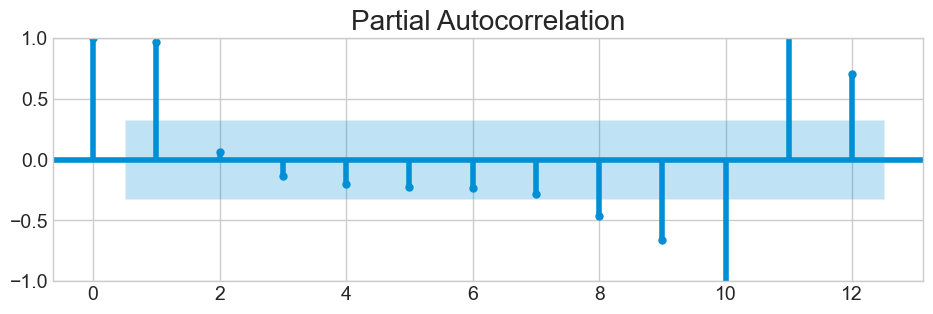

In [192]:
plt.rcParams.update({'figure.figsize': (10,3)})
plot_acf(income_1_df.Доходы_1, lags=12)
plot_pacf(income_1_df.Доходы_1, lags=12)
plt.show()

In [194]:
model = auto_arima(income_1_df, seasonal=True, m=12, trace=True, suppress_warnings=True, error_action='ignore', stepwise=True, trend='t')
model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=907.717, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=896.406, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=900.453, Time=0.02 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=899.931, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=896.406, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=898.183, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=898.187, Time=0.01 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=900.130, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=898.606, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=898.154, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=900.046, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.342 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, trend='t', with_intercept=False)

In [196]:
mod = sm.tsa.statespace.SARIMAX(income_1_df,
                                order=(0, 1, 0),
                                seasonal_order=(0, 0, 0, 12))

results = mod.fit()

print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25678D+01    |proj g|=  2.83329D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.833D-07   1.257D+01
  F =   12.567835118072770     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.623e+09   1.42e+09    

 This problem is unconstrained.


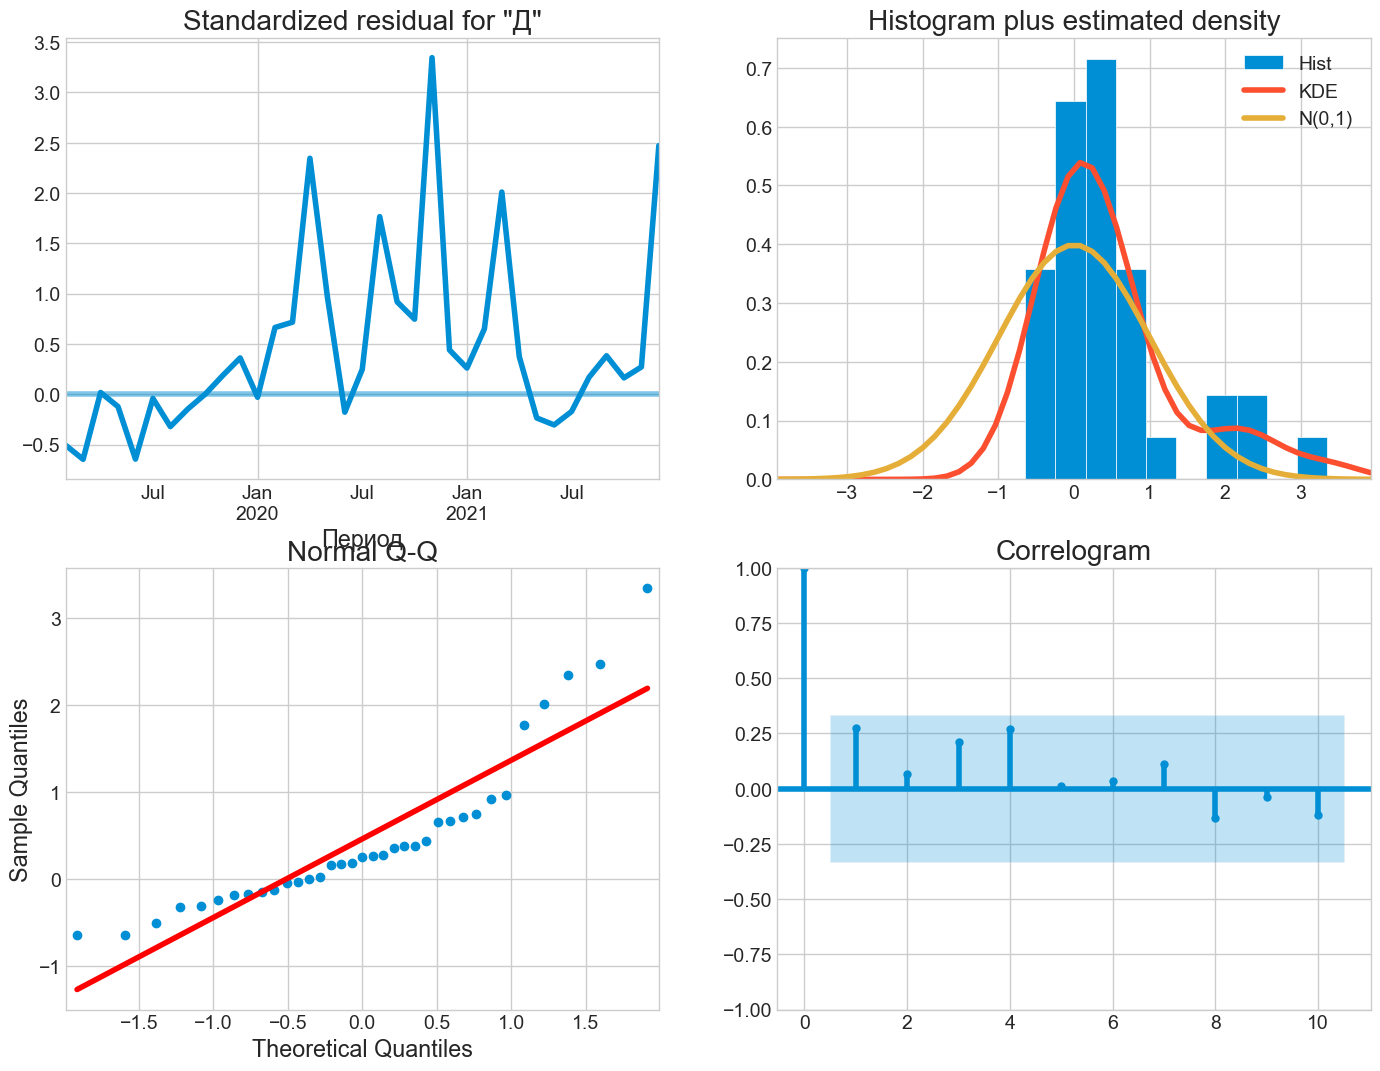

In [197]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [198]:
predict=results.get_prediction(start='2019-02-01')
metrics(income_1_df['2019-02-01':], predict.predicted_mean)

Тест на стационарность:
	T-статистика = -3.768
	P-значение = 0.003
Критические значения :
	1%: -3.639224104416853 - Данные  стационарны с вероятностью 99% процентов
	5%: -2.9512301791166293 - Данные  стационарны с вероятностью 95% процентов
	10%: -2.614446989619377 - Данные  стационарны с вероятностью 90% процентов
MAD: 63953.144
MSE: 9897565204.2907
MAPE: 0.0064
MPE: 0.0044
Стандартная ошибка: 99486.5076


In [199]:
predict=results.get_prediction(start='2021-12-01', end='2022-06-01')

In [235]:
predict.predicted_mean

2021-12-01    10672860.27
2022-01-01    10915225.28
2022-02-01    10915225.28
2022-03-01    10915225.28
2022-04-01    10915225.28
2022-05-01    10915225.28
2022-06-01    10915225.28
Freq: MS, Name: predicted_mean, dtype: float64

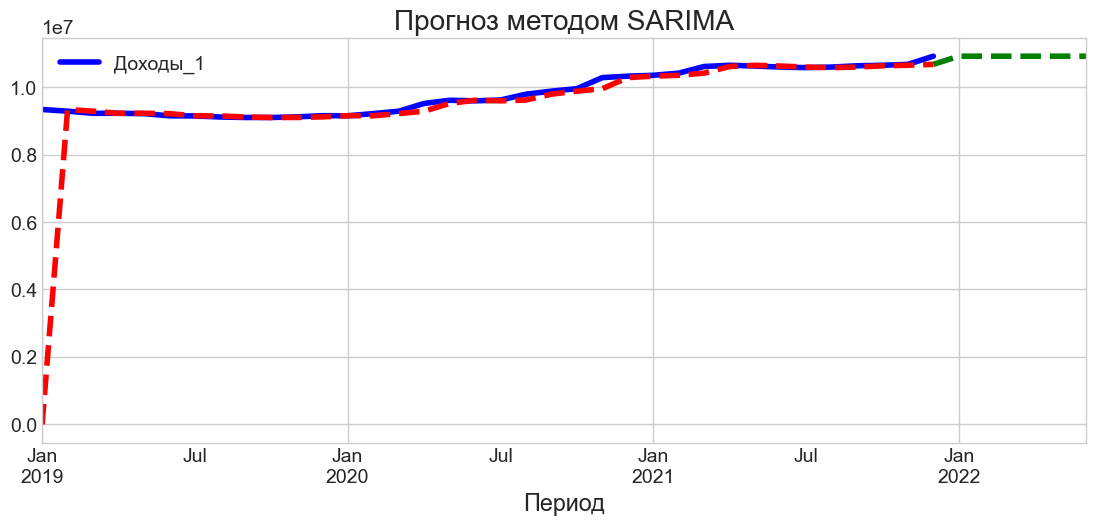

In [200]:
ax = income_1_df.plot(figsize=(12,5), color='blue', title="Прогноз методом SARIMA" )
results.fittedvalues.plot(ax=ax, style='--', color='red')
predict.predicted_mean.plot(ax=ax, style='--', color='green')
plt.show()

In [204]:
from statsmodels.tsa.ar_model import AutoReg
dftest = adfuller(income_1_df.Доходы_1, autolag='AIC')
dftest

(1.0863408300638069,
 0.9950983445813818,
 0,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 644.9998966564651)

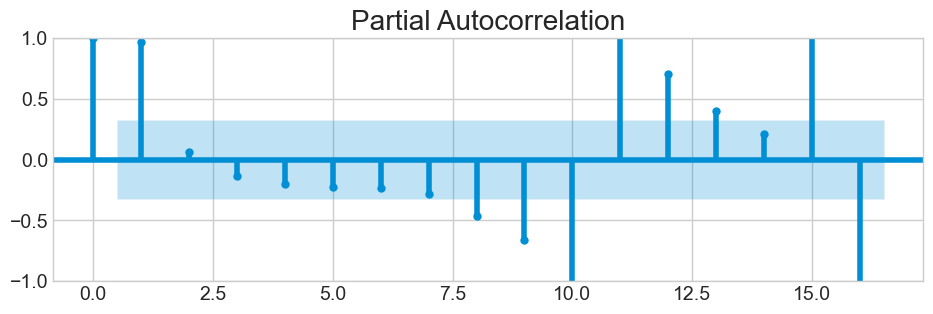

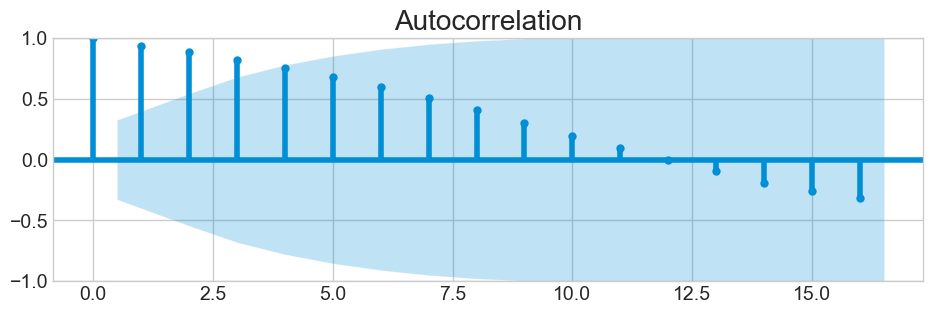

In [205]:
pacf = plot_pacf(income_1_df.Доходы_1, lags=16)
acf = plot_acf(income_1_df.Доходы_1, lags=16)

In [206]:
model = AutoReg(income_1_df.Доходы_1, lags=16).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:               Доходы_1   No. Observations:                   36
Model:                    AutoReg(16)   Log Likelihood                -241.912
Method:               Conditional MLE   S.D. of innovations          43332.168
Date:                Fri, 31 Mar 2023   AIC                            519.824
Time:                        19:30:59   BIC                            537.747
Sample:                    05-01-2020   HQIC                           523.322
                         - 12-01-2021                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         8.392e+06   6.05e+06      1.387      0.165   -3.46e+06    2.02e+07
Доходы_1.L1      0.4223      0.376      1.123      0.262      -0.315       1.159
Доходы_1.L2     -0.2745      0.284     -0.96

Период
2021-01-01    1.033804e+07
2021-02-01    1.036672e+07
2021-03-01    1.061926e+07
2021-04-01    1.065822e+07
2021-05-01    1.066891e+07
2021-06-01    1.060840e+07
2021-07-01    1.057518e+07
2021-08-01    1.063963e+07
2021-09-01    1.065668e+07
2021-10-01    1.067018e+07
2021-11-01    1.062519e+07
2021-12-01    1.086711e+07
Freq: MS, dtype: float64


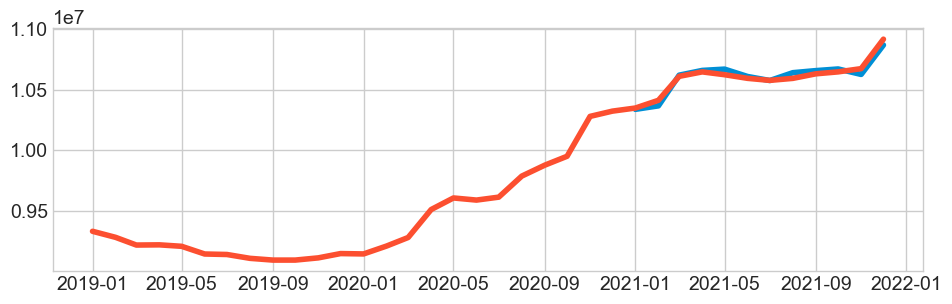

In [208]:
pred = model.predict(start=len(train1), end=len(income_1_df)-1, dynamic=False)
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(income_1_df)
print(pred)

2022-01-01    1.002688e+07
2022-02-01    1.009269e+07
2022-03-01    1.021954e+07
2022-04-01    9.642084e+06
2022-05-01    9.690638e+06
2022-06-01    9.401740e+06
2022-07-01    9.735933e+06
Freq: MS, dtype: float64
7


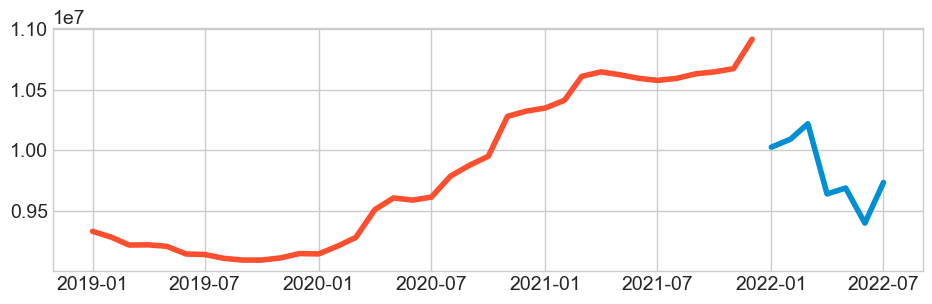

In [209]:
future_pred = model.predict(start=len(income_1_df), end=len(income_1_df)+6, dynamic=False)
pyplot.plot(future_pred)
pyplot.plot(income_1_df)
print(future_pred)
print(len(future_pred))

In [210]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from datetime import datetime

In [211]:
df.head()

,Доходы_1,Доходы_2
Период,,
2019-01-01,9334750.309,3.954998e+06
2019-02-01,9285036.374,3.917801e+06
2019-03-01,9221571.473,3.858750e+06
2019-04-01,9223271.382,3.843909e+06
2019-05-01,9211187.625,3.817744e+06


In [212]:
from sklearn.preprocessing import MinMaxScaler

from math import ceil

def lstm_prediction(df):
    shape=df.shape[0]
    df_new=df[['Доходы_1']]
    dataset = df_new.values
    train=df_new[:ceil(shape*0.75)]
    valid=df_new[ceil(shape*0.75):]

    print('Shape of Training Set',train.shape)
    print('Shape of Validation Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(4,len(train)):
        x_train.append(scaled_data[i-4:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 4:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(4,inputs.shape[0]):
        X_test.append(inputs[i-4:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid['Predictions'] = closing_price
    plt.plot(train['Доходы_1'])
    plt.plot(valid[['Доходы_1','Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Доходы_1',size=20)
    plt.title('Предсказание доходов с помощью Long Short Term Memory (LSTM)',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

Shape of Training Set (27, 1)
Shape of Validation Set (9, 1)
23/23 - 2s - loss: 0.0969 - 2s/epoch - 100ms/step
1/1 [==============================] - 0s 484ms/step
RMSE value on validation set: Доходы_1    731346.969705
dtype: float64
-----------------------------------------------------------
-----------------------------------------------------------


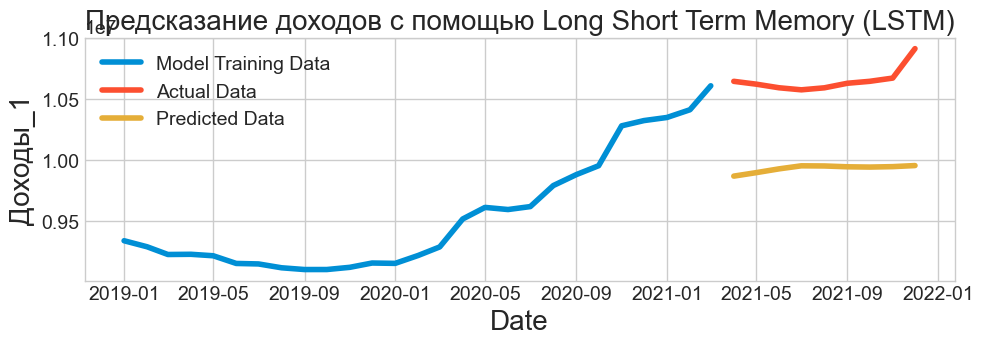

In [213]:
lstm_prediction(df)

In [214]:
import warnings

warnings.filterwarnings("ignore")

In [215]:
from etna.datasets import TSDataset
from etna.models import CatBoostPerSegmentModel
from etna.transforms import LagTransform
from etna.transforms import LinearTrendTransform
from etna.metrics import SMAPE, MAE, MAPE
from etna.analysis import plot_backtest

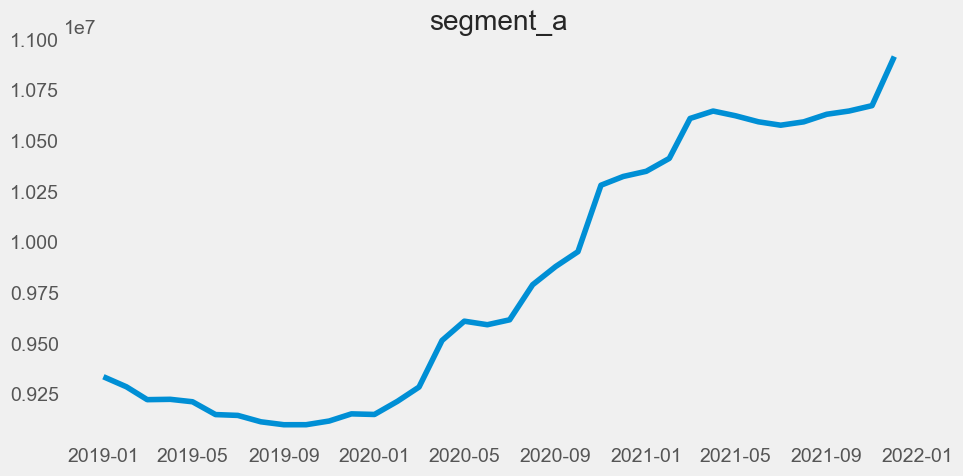

In [270]:
df = pd.read_excel("../dataFrames/Project1_dataset_etna.xlsx", sheet_name='etna_1')
df = TSDataset.to_dataset(df)
ts = TSDataset(df, freq="MS")

ts.plot()

In [271]:
ts.head()

segment,segment_a
feature,target
timestamp,
2019-01-01,9334750.309
2019-02-01,9285036.374
2019-03-01,9221571.473
2019-04-01,9223271.382
2019-05-01,9211187.625


In [272]:
from etna.transforms import MeanTransform, LagTransform, LogTransform, DateFlagsTransform, LinearTrendTransform

In [278]:
log = LogTransform(in_column='target')
trend = LinearTrendTransform(in_column='target')

lags = LagTransform(in_column='target', lags=list(range(12, 3, 1)))
m_lags = DateFlagsTransform(month_number_in_year=True,
                            year_number=True,)

In [279]:
train_ts, test_ts = ts.train_test_split(train_start='2019-01-01',
                                        train_end='2021-06-01',
                                        test_start='2021-07-01',
                                        test_end='2021-12-01')
train_ts.fit_transform([log, trend, lags, m_lags])

In [280]:
from etna.models import CatBoostModelMultiSegment
model = CatBoostModelMultiSegment()
model.fit(train_ts)

CatBoostModelMultiSegment(iterations = None, depth = None, learning_rate = None, logging_level = 'Silent', l2_leaf_reg = None, thread_count = None, )

In [281]:
future_ts = train_ts.make_future(12)
forecast_ts = model.forecast(future_ts)

In [282]:
forecast_ts.head(12)

segment                                                                                                                                                                                                                                                                                                                                      segment_a  \
feature    DateFlagsTransform(day_number_in_week = False, day_number_in_month = False, day_number_in_year = False, week_number_in_month = False, week_number_in_year = False, month_number_in_year = False, season_number = False, year_number = False, is_weekend = True, special_days_in_week = (), special_days_in_month = (), out_column = None, )   
timestamp                                                                                                                                                                                                                                                                                                                                                
2021-07-01                                              False                                                                                                                                                                                                                                                                                            
2021-08-01                                               True                                                                                                                                                                                                                                                                                            
2021-09-01                                              False                                                                                                                                                                                                                                                                                            
2021-10-01                                              False                                                                                                                                                                                                                                                                                            
2021-11-01                                              False                                                                                                                                                                                                                                                                                            
2021-12-01                                              False                                                                                                                                                                                                                                                                                            
2022-01-01                                               True                                                                                                                                                                                                                                                                                            
2022-02-01                                              False                                                                                                                                                                                                                                                                                            
2022-03-01                                              False                                                                                                                                     

In [248]:
forecast_ts.info()

<class 'etna.datasets.TSDataset'>
num_segments: 1
num_exogs: 5
num_regressors: 5
num_known_future: 0
freq: MS
          start_timestamp end_timestamp  length  num_missing
segments                                                    
segment_a      2021-07-01    2022-06-01      12            0


In [224]:
smape = SMAPE()
smape(y_true=test_ts, y_pred=forecast_ts)

ValueError: y_true and y_pred have different timestamps

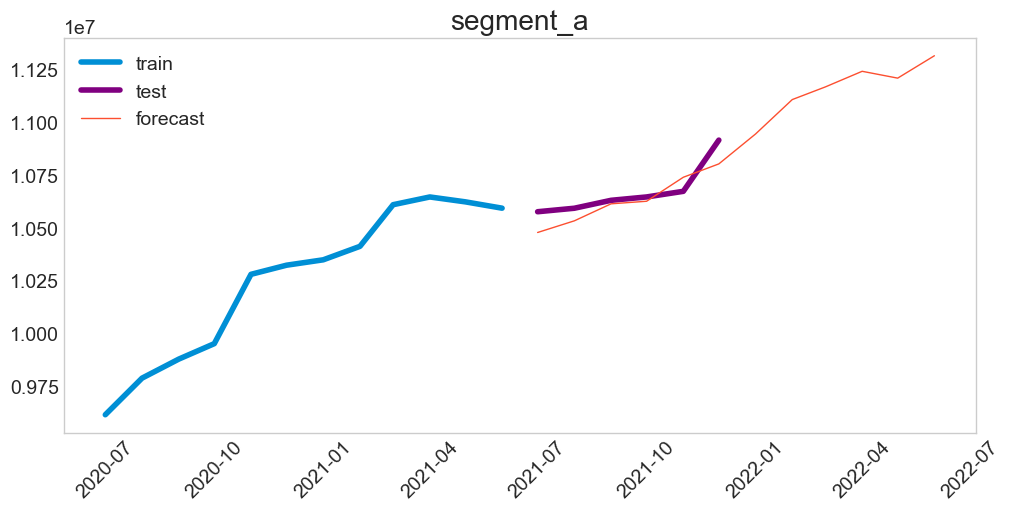

In [225]:
from etna.analysis import plot_forecast

train_ts.inverse_transform()
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=12)

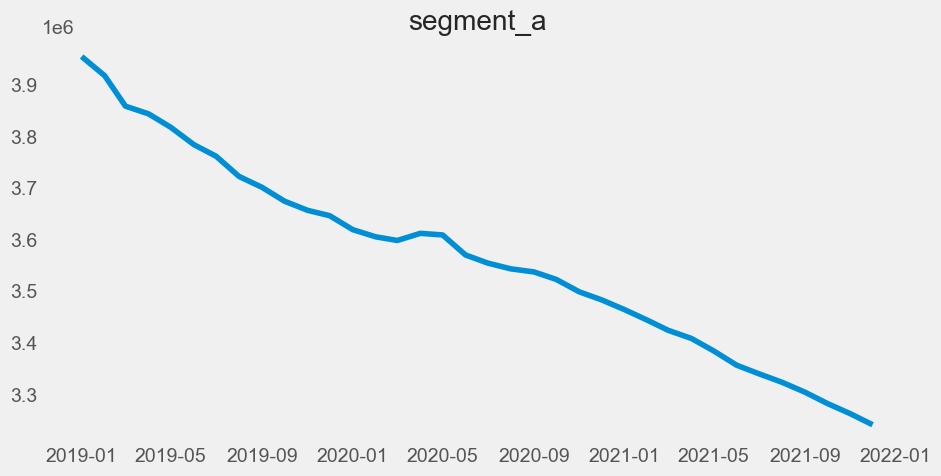

In [268]:
df_2 = pd.read_excel("../dataFrames/Project1_dataset_etna.xlsx", sheet_name='etna_2')
df_2 = TSDataset.to_dataset(df_2)
ts_2 = TSDataset(df_2, freq="MS")

ts_2.plot()

In [269]:
ts_2.head()

segment,segment_a
feature,target
timestamp,
2019-01-01,3.954998e+06
2019-02-01,3.917801e+06
2019-03-01,3.858750e+06
2019-04-01,3.843909e+06
2019-05-01,3.817744e+06


In [291]:
train_ts, test_ts = ts_2.train_test_split(train_start='2019-01-01',
                                        train_end='2021-07-01',
                                        test_start='2021-08-01',
                                        test_end='2021-12-01')
train_ts.fit_transform([log, trend, lags, m_lags])

In [292]:
future_ts = train_ts.make_future(11)
forecast_ts = model.forecast(future_ts)

In [295]:
forecast_ts.head(11)

segment                                                                                                                                                                                                                                                                                                                                      segment_a  \
feature    DateFlagsTransform(day_number_in_week = False, day_number_in_month = False, day_number_in_year = False, week_number_in_month = False, week_number_in_year = False, month_number_in_year = False, season_number = False, year_number = False, is_weekend = True, special_days_in_week = (), special_days_in_month = (), out_column = None, )   
timestamp                                                                                                                                                                                                                                                                                                                                                
2021-08-01                                               True                                                                                                                                                                                                                                                                                            
2021-09-01                                              False                                                                                                                                                                                                                                                                                            
2021-10-01                                              False                                                                                                                                                                                                                                                                                            
2021-11-01                                              False                                                                                                                                                                                                                                                                                            
2021-12-01                                              False                                                                                                                                                                                                                                                                                            
2022-01-01                                               True                                                                                                                                                                                                                                                                                            
2022-02-01                                              False                                                                                                                                                                                                                                                                                            
2022-03-01                                              False                                                                                                                                                                                                                                                                                            
2022-04-01                                              False                                                                                                                                     

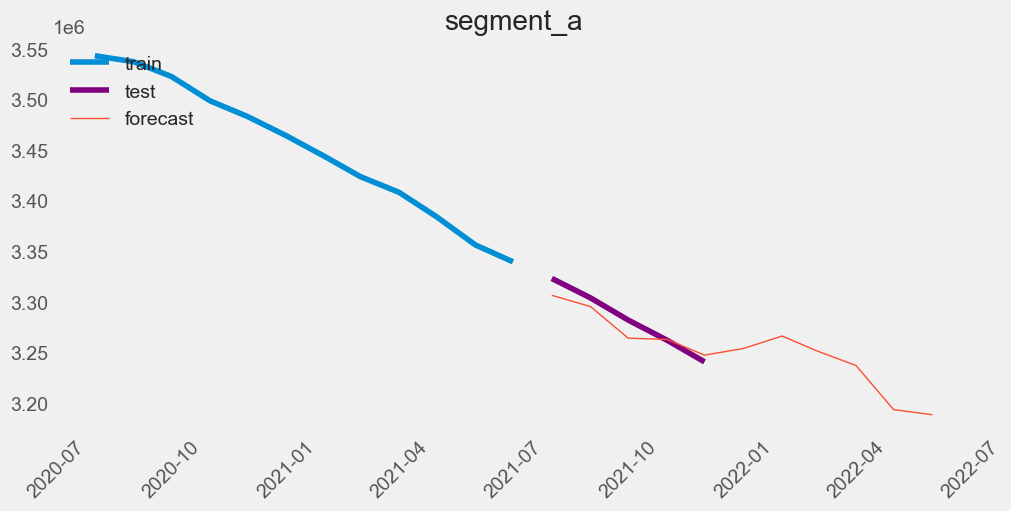

In [294]:
train_ts.inverse_transform()
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=12)

In [226]:
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [227]:
df = pd.read_excel('../dataFrames/Project1_dataset.xlsx')
# Convert the date column to a datetime object
df['Период'] = pd.to_datetime(df['Период'], format='%Y%m')

# Change the date format to '01.01.2019'
df['Период'] = df['Период'].dt.strftime('%d.%m.%Y')

df['Период'] = pd.to_datetime(df['Период'], format='%d.%m.%Y')
df_1 = df.drop(['Доходы_2'], axis=1)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Период    36 non-null     datetime64[ns]
 1   Доходы_1  36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [228]:
df_1.columns =['ds', 'y']
df_1.head()

,ds,y
0,2019-01-01,9334750.309
1,2019-02-01,9285036.374
2,2019-03-01,9221571.473
3,2019-04-01,9223271.382
4,2019-05-01,9211187.625


In [229]:
m = Prophet(interval_width=0.97, seasonality_prior_scale=12)
model = m.fit(df_1)

19:32:46 - cmdstanpy - INFO - Chain [1] start processing
19:32:47 - cmdstanpy - INFO - Chain [1] done processing


In [230]:
future = m.make_future_dataframe(periods=6, freq='MS')
forecast_fb = m.predict(future)
forecast_fb.tail(6)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
36,2022-01-01,1.077188e+07,1.072080e+07,1.083865e+07,1.075692e+07,1.078568e+07,7355.442860,7355.442860,7355.442860,7355.442860,7355.442860,7355.442860,0.0,0.0,0.0,1.077924e+07
37,2022-02-01,1.079269e+07,1.068599e+07,1.083092e+07,1.074920e+07,1.083427e+07,-30637.668860,-30637.668860,-30637.668860,-30637.668860,-30637.668860,-30637.668860,0.0,0.0,0.0,1.076205e+07
38,2022-03-01,1.081149e+07,1.071448e+07,1.090134e+07,1.072921e+07,1.088652e+07,-562.824734,-562.824734,-562.824734,-562.824734,-562.824734,-562.824734,0.0,0.0,0.0,1.081092e+07
39,2022-04-01,1.083230e+07,1.074282e+07,1.099786e+07,1.070752e+07,1.093790e+07,36764.566352,36764.566352,36764.566352,36764.566352,36764.566352,36764.566352,0.0,0.0,0.0,1.086906e+07
40,2022-05-01,1.085244e+07,1.070456e+07,1.102256e+07,1.068857e+07,1.098638e+07,22954.328867,22954.328867,22954.328867,22954.328867,22954.328867,22954.328867,0.0,0.0,0.0,1.087539e+07
41,2022-06-01,1.087325e+07,1.062964e+07,1.102107e+07,1.067086e+07,1.105626e+07,-39075.704313,-39075.704313,-39075.704313,-39075.704313,-39075.704313,-39075.704313,0.0,0.0,0.0,1.083417e+07


In [231]:
forecast_fb[['ds', 'yhat']]

,ds,yhat
0,2019-01-01,9.324106e+06
1,2019-02-01,9.264625e+06
2,2019-03-01,9.245300e+06
3,2019-04-01,9.231570e+06
4,2019-05-01,9.210933e+06
5,2019-06-01,9.155689e+06
6,2019-07-01,9.150340e+06
7,2019-08-01,9.105825e+06
8,2019-09-01,9.094496e+06
9,2019-10-01,9.095232e+06


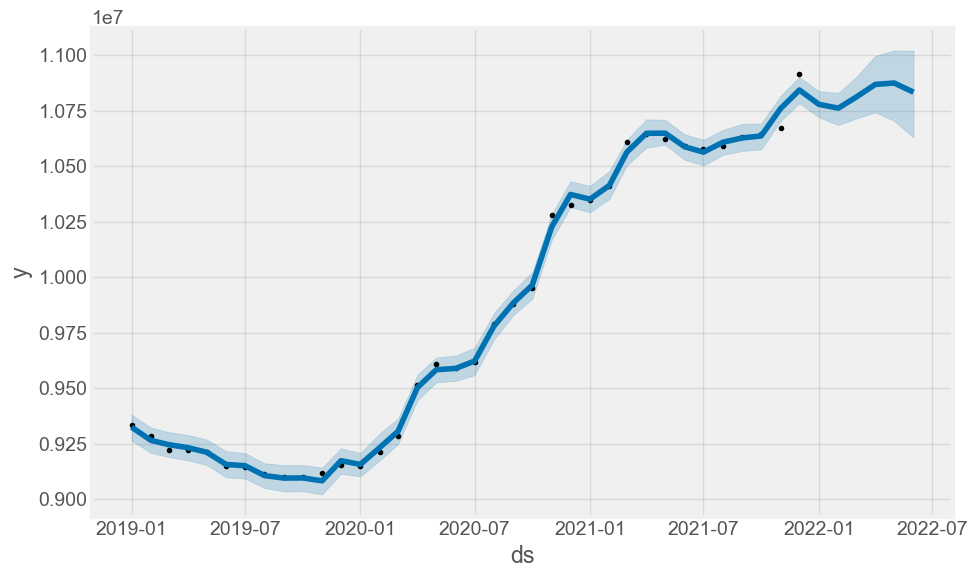

In [232]:
plot1 = m.plot(forecast_fb)

In [296]:
df = pd.read_excel('../dataFrames/Project1_dataset.xlsx')
# Convert the date column to a datetime object
df['Период'] = pd.to_datetime(df['Период'], format='%Y%m')

# Change the date format to '01.01.2019'
df['Период'] = df['Период'].dt.strftime('%d.%m.%Y')

df['Период'] = pd.to_datetime(df['Период'], format='%d.%m.%Y')
df_2_fb = df.drop(['Доходы_1'], axis=1)
df_2_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Период    36 non-null     datetime64[ns]
 1   Доходы_2  36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [298]:
df_2_fb.columns =['ds', 'y']
m = Prophet(interval_width=0.97, seasonality_prior_scale=12)
model = m.fit(df_2_fb)

21:45:57 - cmdstanpy - INFO - Chain [1] start processing
21:46:18 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=6, freq='MS')
forecast_fb_2 = m.predict(future)

In [303]:
forecast_fb_2.tail(6)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
36,2022-01-01,3.219457e+06,3.197491e+06,3.226412e+06,3.205166e+06,3.234086e+06,-7674.179393,-7674.179393,-7674.179393,-7674.179393,-7674.179393,-7674.179393,0.0,0.0,0.0,3.211783e+06
37,2022-02-01,3.198318e+06,3.143766e+06,3.228576e+06,3.158242e+06,3.243053e+06,-14476.909902,-14476.909902,-14476.909902,-14476.909902,-14476.909902,-14476.909902,0.0,0.0,0.0,3.183841e+06
38,2022-03-01,3.179224e+06,3.084426e+06,3.230901e+06,3.110444e+06,3.256919e+06,-26017.849118,-26017.849118,-26017.849118,-26017.849118,-26017.849118,-26017.849118,0.0,0.0,0.0,3.153206e+06
39,2022-04-01,3.158085e+06,3.043911e+06,3.284957e+06,3.049892e+06,3.290938e+06,-5980.609266,-5980.609266,-5980.609266,-5980.609266,-5980.609266,-5980.609266,0.0,0.0,0.0,3.152104e+06
40,2022-05-01,3.137628e+06,2.987152e+06,3.312644e+06,2.988904e+06,3.314396e+06,-1751.592813,-1751.592813,-1751.592813,-1751.592813,-1751.592813,-1751.592813,0.0,0.0,0.0,3.135876e+06
41,2022-06-01,3.116489e+06,2.923323e+06,3.341505e+06,2.925451e+06,3.343633e+06,-2127.380575,-2127.380575,-2127.380575,-2127.380575,-2127.380575,-2127.380575,0.0,0.0,0.0,3.114361e+06


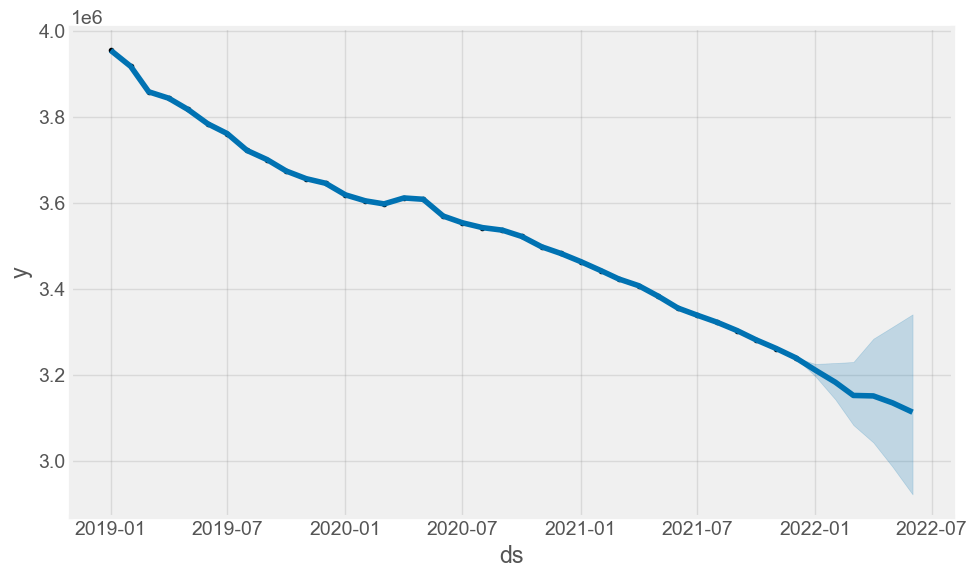

In [301]:
plot2 = m.plot(forecast_fb_2)

In [304]:
df_ex = pd.read_excel('../dataFrames/pred_proj1_income2.xlsx')
df_ex

,Период,Прогноз_доход1,Прогноз_Доход2,Прогноз_общий доход
0,2022-01-01,10944250,3220164,14164414
1,2022-02-01,11107100,3204174,14311274
2,2022-03-01,11167110,3191751,14358861
3,2022-04-01,11240880,3191696,14432576
4,2022-05-01,11208520,3178942,14387462
5,2022-06-01,11314480,3146779,14461259


In [305]:
df_ex.to_csv("predicted_proj1.csv", index=False)